# Sepsis Survival
<img style="height:300px; width:100%" src='trialimg.png' >

<h3><strong>What is Sepsis ?</strong></h3>
Sepsis occurs when chemicals released in the bloodstream to fight an infection trigger inflammation throughout the body. This can cause a cascade of changes that damage multiple organ systems, leading them to fail, sometimes even resulting in death.


<br>
<h3><strong>Sepsis dataset</strong></h3>
Sepsis dataset is a simulated clinical trial with two groups treatment about sepsis desease. See details. This dataset is taken from SIDES method

Sepsis contains simulated data on 470 subjects with a binary outcome survival, that stores survival status for patient after 28 days of treatment, value of 1 for subjects who died after 28 days and 0 otherwise. There are 11 covariates, listed below, all of which are numerical variables.

Note that contrary to the original dataset used in SIDES, missing values have been imputed by random forest randomForest::rfImpute(). See file data-raw/sepsis.R for more details.

True subgroup is PRAPACHE <= 26 & AGE <= 49.80. NOTE: This subgroup is defined with the lower event rate (survival = 1) in treatement arm.

470 patients and 13 variables:

<ul>
    <li>survival : binary outcome </li>
<li>THERAPY : 1 for active treatment, 0 for control treatment</li>
<li>TIMFIRST : Time from first sepsis-organ fail to start drug</li>
<li>AGE : Patient age in years</li>
<li>BLLPLAT : Baseline local platelets</li>
<li>blSOFA : Sum of baselin sofa (cardiovascular, hematology, hepaticrenal, and respiration scores)</li>
<li>BLLCREAT : Base creatinine</li>
<li>ORGANNUM : Number of baseline organ failures</li>
<li>PRAPACHE : Pre-infusion apache-ii score</li>
<li>BLGCS : Base GLASGOW coma scale score</li>
<li>BLIL6 : Baseline serum IL-6 concentration</li>
<li>BLADL : Baseline activity of daily living score</li>
<li>BLLBILI : Baseline local bilirubin</li>
</ul>    

<br>
<h3><strong>Some Terminologies</strong></h3>
<ul>
    <li>Active Treatment Group: randomized group of patients who recieves the new treatment</li>
     <li>Control Group: randomized group of patients who recieves the standard treatment</li>
    <li>Subgroup: samples broken down into different sets, based on study observed in correspondance to the enhanced treatment </li>
    <li>{Y,T,X1,…,Xn}: Y is the outcome ,T is for Treatment Groups 0 for control 1 for active, X1 to Xn are the covaratives/features.</li>
    <li> let P1i=P(Yi=1|Ti=1,Xi) </li>
    <li>let P0i=P(Yi=1|Ti=0,Xi) </li>

</ul>


## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
flauti = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.color_palette(flauti)
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('sepsis.csv',index_col=0)

In [3]:
data.head()

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA
1,0,1,19,42.921,15,1,301.8,191.000000,2.913416,1.0,17.17,0.0,5.00
2,1,1,48,68.818,11,2,118.9,264.156481,0.400000,1.1,17.17,5.0,10.00
3,0,1,20,68.818,15,2,92.8,123.000000,5.116471,1.0,10.00,1.0,7.50
4,0,1,19,33.174,14,2,1232.0,244.000000,3.142092,1.2,17.17,0.0,6.25
5,0,1,48,46.532,3,4,2568.0,45.000000,4.052668,3.0,10.00,0.0,12.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 1 to 470
Data columns (total 13 columns):
survival    470 non-null int64
THERAPY     470 non-null int64
PRAPACHE    470 non-null int64
AGE         470 non-null float64
BLGCS       470 non-null int64
ORGANNUM    470 non-null int64
BLIL6       470 non-null float64
BLLPLAT     470 non-null float64
BLLBILI     470 non-null float64
BLLCREAT    470 non-null float64
TIMFIRST    470 non-null float64
BLADL       470 non-null float64
blSOFA      470 non-null float64
dtypes: float64(8), int64(5)
memory usage: 51.4 KB


**this dataset has no null values, as stated from the data description it has been imputed using the random forest**

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
survival,470.0,0.385106,0.487139,0.000,0.000,0.000,1.000000,1.000
THERAPY,470.0,0.674468,0.469073,0.000,0.000,1.000,1.000000,1.000
PRAPACHE,470.0,25.325532,7.544777,19.000,19.000,23.000,28.000000,48.000
AGE,470.0,59.849170,16.380839,33.174,46.532,59.871,73.138000,93.336
BLGCS,470.0,11.634043,3.752769,3.000,9.000,13.000,15.000000,15.000
ORGANNUM,470.0,2.442553,1.074961,0.000,2.000,2.000,3.000000,5.000
BLIL6,470.0,21794.429323,72250.880884,37.100,118.900,406.600,2568.000000,296550.000
BLLPLAT,470.0,192.283355,148.432852,45.000,92.000,153.000,244.000000,650.000
BLLBILI,470.0,2.719506,4.785783,0.400,0.600,1.000,2.500000,20.400
BLLCREAT,470.0,3.103750,4.631572,1.000,1.000,1.500,3.000000,20.000


## Exploratory Data Analysis (EDA)

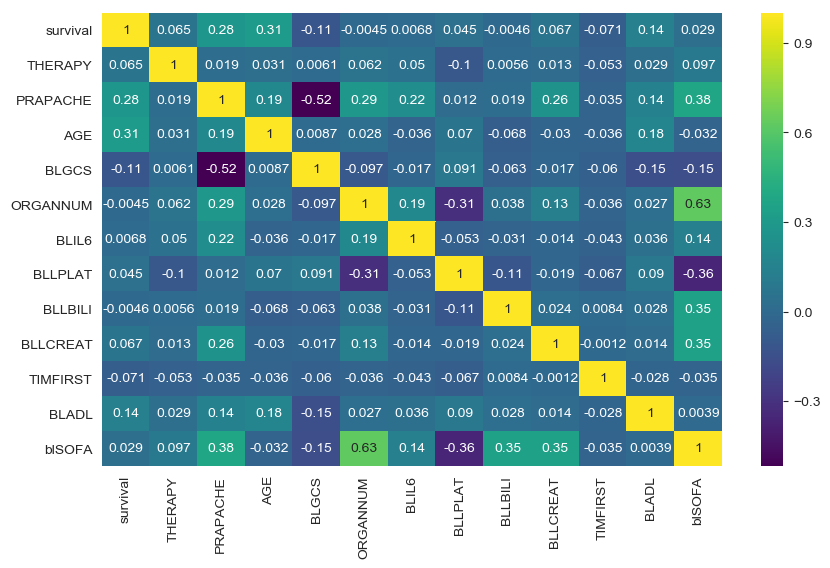

In [6]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(data.corr(),cmap='viridis',annot=True)

this data set seems to have poor linear relationship between each other

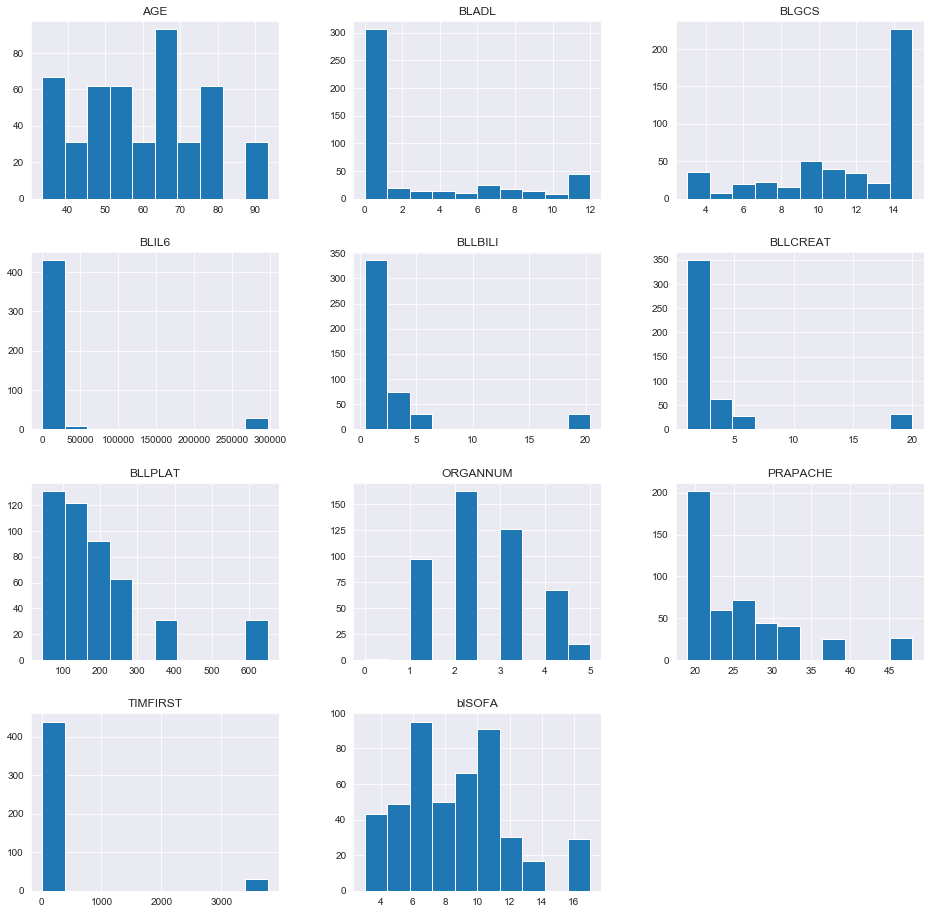

In [7]:
data.drop(['THERAPY','survival'],axis=1).hist(figsize=(16,16));

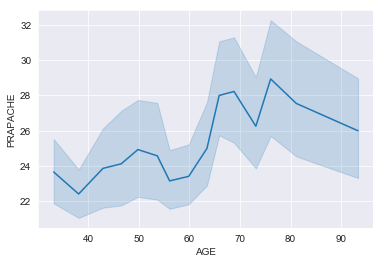

In [8]:
sns.lineplot(data=data,x='AGE',y='PRAPACHE')

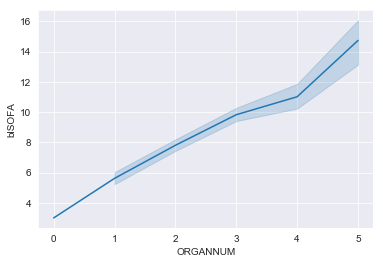

In [9]:
sns.lineplot(data=data,x='ORGANNUM',y='blSOFA')

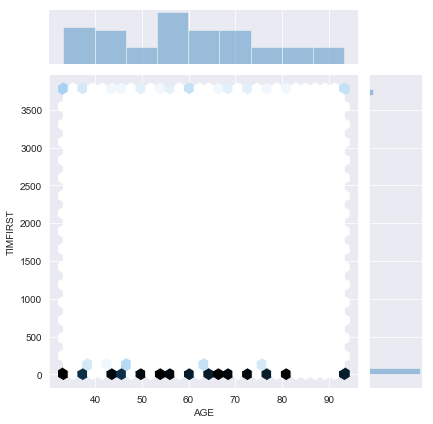

In [10]:
sns.jointplot(data=data,x='AGE', y='TIMFIRST', kind='hex')

most of the points for TIMFIRST lies below  50 points

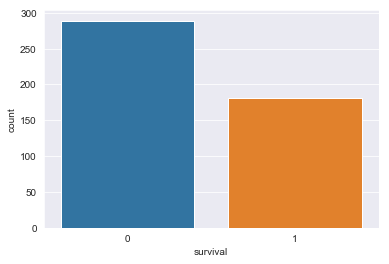

In [11]:
sns.countplot(data=data,x='survival')

In [12]:
data.survival.value_counts()/len(data) * 100

0    61.489362
1    38.510638
Name: survival, dtype: float64

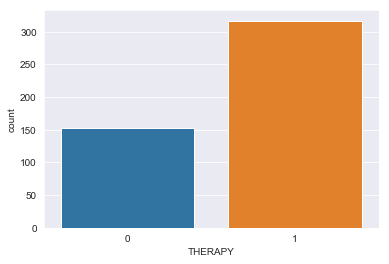

In [13]:
sns.countplot(data=data,x='THERAPY')

In [14]:
data.THERAPY.value_counts()/len(data) * 100

1    67.446809
0    32.553191
Name: THERAPY, dtype: float64

the data is not imbalanced, tho we can try some method to handle these proportions but since we are not developing a full model yet ,we can skip this method for now.

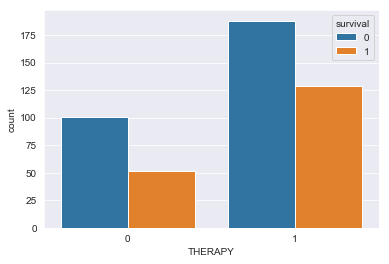

In [15]:
sns.countplot(data=data,x='THERAPY',hue='survival')

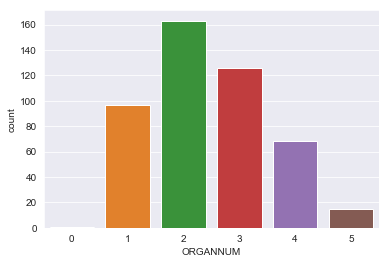

In [16]:
sns.countplot(data['ORGANNUM'])

In [17]:
data[data['ORGANNUM'] == 0 ]

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA
373,1,0,19,93.336,8,0,519.4,244.0,0.7,1.0,39.83,12.0,3.0


only one datapoint seems to have a 0 ORGANNUM. should we be worried how it affects our model?

the ORGANNUM is a baseline of organ failure so it is not a categorical ordinal data. 5 is higher than 0 so no we should not be worried or remove it from our data, since in the future there might be possible cases of 0 in baseline of organ failure

**let's explore survival rate for an baseline of organ failure >=4 and < 4**

In [18]:
data[data['ORGANNUM'] >= 4].survival.value_counts()/len(data[data['ORGANNUM'] >= 4])

0    0.638554
1    0.361446
Name: survival, dtype: float64

In [19]:
data[data['ORGANNUM'] < 4].survival.value_counts()/len(data[data['ORGANNUM'] < 4])

0    0.609819
1    0.390181
Name: survival, dtype: float64

from the above no strong notable difference, remembering that survival 0 is more than survival 1 so we might get a perfect seperation between them

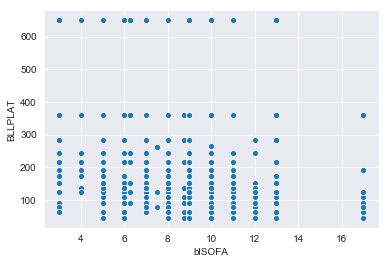

In [20]:
sns.scatterplot(data=data,x='blSOFA',y='BLLPLAT')

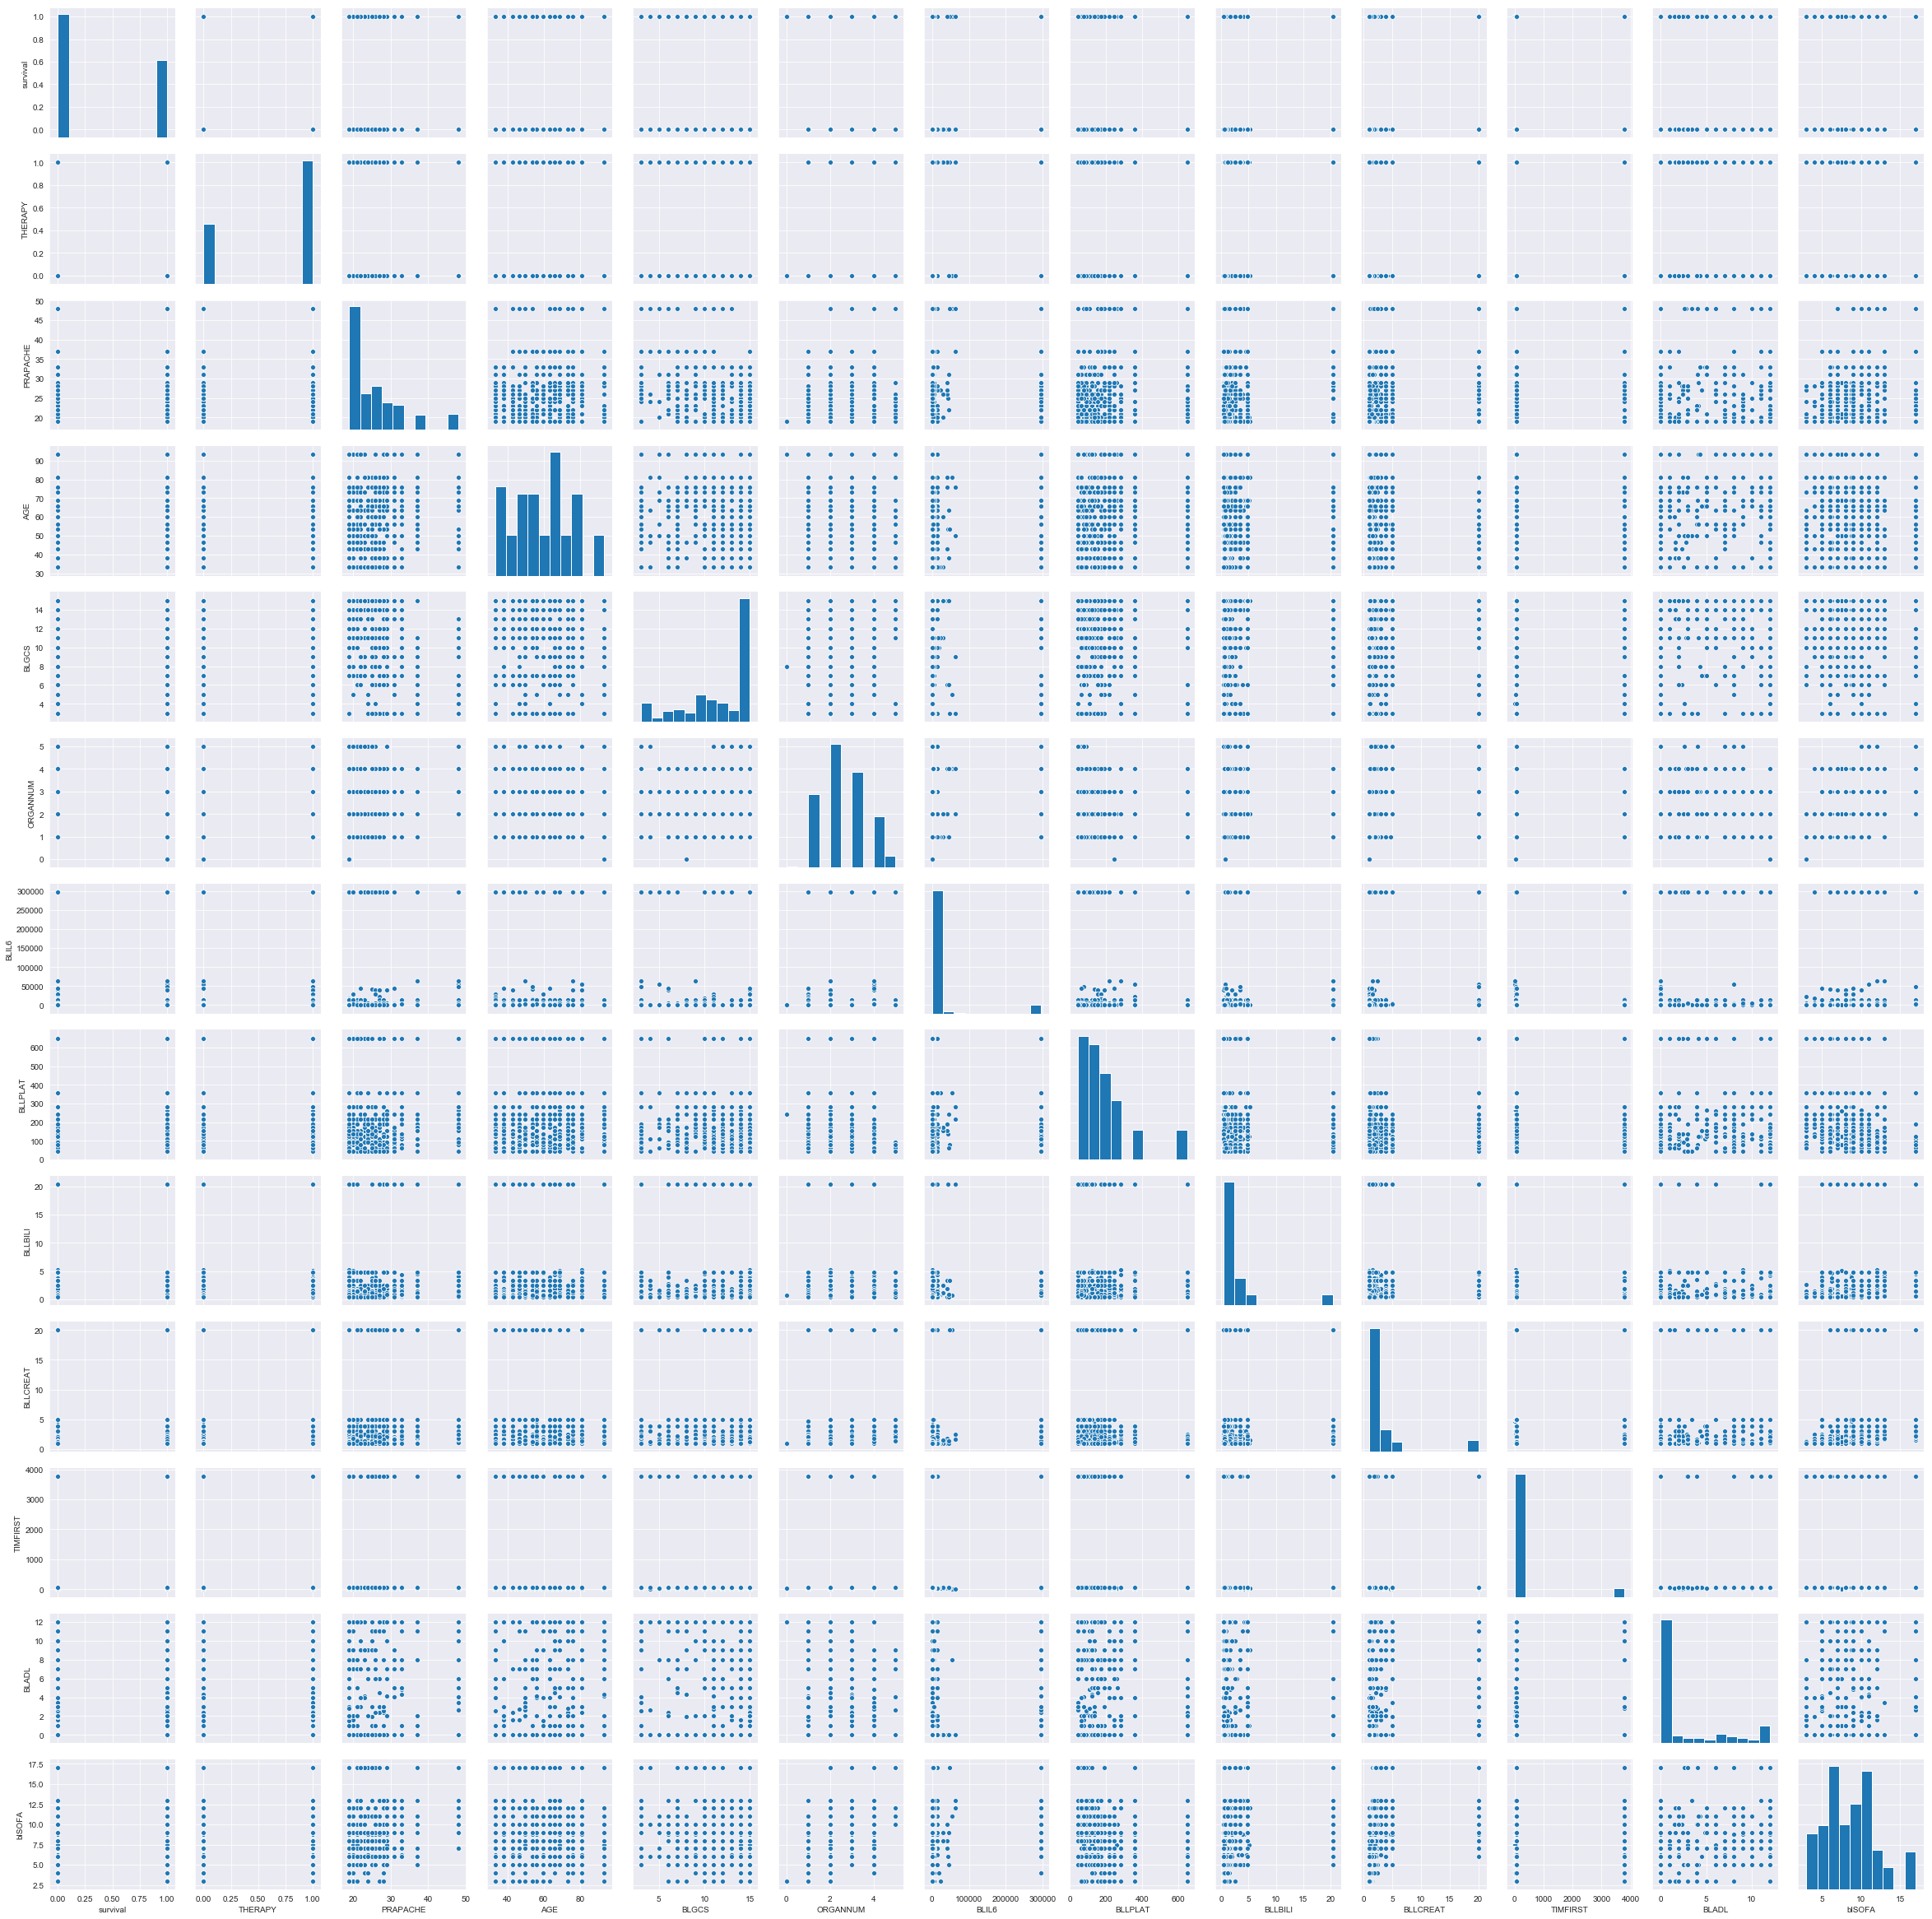

In [21]:
sns.pairplot(data)

## Data Transformation

seperate the data by the treatment groups(THERAPY) and then apply the model of one group to another

In [22]:
active_group = data[data['THERAPY']==1]
control_group = data[data['THERAPY']==0]

In [23]:
len(active_group)

317

In [24]:
active_group.head()

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA
1,0,1,19,42.921,15,1,301.8,191.000000,2.913416,1.0,17.17,0.0,5.00
2,1,1,48,68.818,11,2,118.9,264.156481,0.400000,1.1,17.17,5.0,10.00
3,0,1,20,68.818,15,2,92.8,123.000000,5.116471,1.0,10.00,1.0,7.50
4,0,1,19,33.174,14,2,1232.0,244.000000,3.142092,1.2,17.17,0.0,6.25
5,0,1,48,46.532,3,4,2568.0,45.000000,4.052668,3.0,10.00,0.0,12.00


In [25]:
control_group.head()

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA
6,0,0,21,56.098,14,1,162.65,137.0,0.500000,4.662556,10.00,0.0,8.75
7,1,0,19,68.818,15,2,2568.00,45.0,4.192245,1.000000,19.33,12.0,8.75
11,0,0,24,59.871,15,1,301.80,650.0,4.681647,1.400000,21.73,0.0,6.25
15,0,0,33,65.891,14,4,12998.00,284.0,4.397983,3.000000,30.67,0.0,13.00
16,0,0,19,81.130,15,2,212.30,284.0,5.171412,1.500000,30.67,9.0,12.00


We can drop the treatment group as it might not necessarily be essential

In [26]:
X_train_active_group = active_group.drop(['survival','THERAPY'],axis=1)
y_train1_active_group = active_group['survival']
X_test_active_group = control_group.drop(['survival','THERAPY'],axis=1)

In [31]:
X_train_control_group = control_group.drop(['survival','THERAPY'],axis=1)
y_train0_control_group = control_group['survival']
X_test_control_group = active_group.drop(['survival','THERAPY'],axis=1)

meanwhile as we interchange this models based on the treatment group, applying the active group to the control group and otherwise,
we store p1 and p0 of the actual survivals for the active and control group before getting our new predictions and appending them with the expected prediction if the patient fell in the opposite group.

In [32]:
p1 = y_train1_active_group
p0 = y_train0_control_group

## Model Building

In [33]:
# from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

### Model1
active group is applied to the control group to see what the survival will be if the patients will be given new treatment instead of standard treatment

In [36]:
model1 = RandomForestClassifier(n_estimators=100,oob_score=True,bootstrap=True)

In [37]:
model1.fit(X_train_active_group,y_train1_active_group)

RandomForestClassifier(oob_score=True)

In [38]:
y_p1_of_control_group = model1.predict_proba(X_test_active_group)
y_p1 = model1.predict_proba(X_train_active_group)

### Model2
control group applied to active group to see what the survival of patients will be if the were given standard treatment instead of new treatment 

In [39]:
model2 = RandomForestClassifier(n_estimators=100,oob_score=True,bootstrap=True)

In [40]:
model2.fit(X_train_control_group,y_train0_control_group)

RandomForestClassifier(oob_score=True)

In [41]:
y_p0_of_active_group = model2.predict_proba(X_test_control_group)
y_p0 = model2.predict_proba(X_train_control_group)

### Join 
Join back the Dataset with thier corresponding predicted values if they took the opposite treatment

In [42]:
data_patch = pd.concat([active_group,control_group],axis=0)

In [43]:
p1_patch = np.concatenate([ y_p1[:,1], y_p1_of_control_group[:,1] ],axis=0)
p0_patch = np.concatenate([ y_p0_of_active_group[:,1] ,y_p0[:,1] ],axis=0)

In [44]:
p1_patch

array([0.2 , 0.93, 0.14, 0.04, 0.22, 0.02, 0.03, 0.71, 0.84, 0.24, 0.9 ,
       0.07, 0.11, 0.92, 0.04, 0.68, 0.  , 0.71, 0.89, 0.2 , 0.16, 0.02,
       0.97, 0.97, 0.03, 0.85, 0.82, 0.85, 0.22, 0.38, 0.16, 0.95, 0.01,
       0.12, 0.09, 0.93, 0.22, 0.02, 0.07, 0.82, 0.76, 0.1 , 0.11, 0.1 ,
       0.07, 0.11, 0.81, 0.09, 0.73, 0.79, 0.04, 0.12, 0.71, 0.88, 0.03,
       0.04, 0.63, 0.11, 0.02, 0.36, 0.01, 0.08, 0.89, 0.19, 0.06, 0.72,
       0.81, 0.01, 0.3 , 0.77, 0.01, 0.08, 0.16, 0.9 , 0.03, 0.08, 0.81,
       0.8 , 0.03, 0.66, 0.79, 0.7 , 0.95, 0.89, 0.86, 0.02, 0.05, 0.13,
       0.04, 0.78, 0.15, 0.95, 0.22, 0.95, 0.85, 0.  , 0.89, 0.06, 0.7 ,
       0.14, 0.99, 0.88, 0.13, 0.12, 0.73, 0.65, 0.02, 0.95, 0.15, 0.06,
       0.95, 0.91, 0.28, 0.95, 0.74, 0.65, 0.18, 0.06, 0.19, 0.94, 0.16,
       0.05, 0.82, 0.15, 0.17, 0.11, 0.15, 0.92, 0.73, 0.91, 1.  , 0.14,
       0.15, 0.68, 0.  , 0.32, 0.89, 0.96, 0.13, 0.12, 0.93, 0.86, 0.89,
       0.64, 0.74, 0.14, 0.03, 0.04, 0.97, 0.04, 0.

In [45]:
p0_patch

array([0.5 , 0.47, 0.41, 0.41, 0.43, 0.48, 0.3 , 0.41, 0.31, 0.33, 0.58,
       0.4 , 0.25, 0.25, 0.28, 0.25, 0.12, 0.51, 0.51, 0.43, 0.4 , 0.52,
       0.27, 0.3 , 0.31, 0.46, 0.32, 0.3 , 0.27, 0.34, 0.28, 0.57, 0.24,
       0.25, 0.51, 0.3 , 0.35, 0.34, 0.22, 0.2 , 0.27, 0.26, 0.17, 0.21,
       0.3 , 0.23, 0.29, 0.26, 0.45, 0.42, 0.37, 0.35, 0.38, 0.4 , 0.38,
       0.28, 0.36, 0.31, 0.34, 0.4 , 0.24, 0.39, 0.29, 0.62, 0.36, 0.55,
       0.37, 0.2 , 0.39, 0.43, 0.18, 0.21, 0.46, 0.28, 0.44, 0.42, 0.44,
       0.46, 0.28, 0.37, 0.54, 0.4 , 0.52, 0.28, 0.46, 0.39, 0.31, 0.34,
       0.22, 0.55, 0.64, 0.47, 0.31, 0.47, 0.4 , 0.31, 0.5 , 0.41, 0.47,
       0.42, 0.3 , 0.58, 0.19, 0.45, 0.52, 0.28, 0.17, 0.47, 0.43, 0.17,
       0.35, 0.48, 0.32, 0.3 , 0.3 , 0.31, 0.12, 0.32, 0.38, 0.29, 0.26,
       0.26, 0.5 , 0.39, 0.51, 0.33, 0.49, 0.34, 0.17, 0.42, 0.35, 0.48,
       0.5 , 0.57, 0.23, 0.45, 0.35, 0.21, 0.45, 0.15, 0.29, 0.38, 0.28,
       0.23, 0.56, 0.27, 0.22, 0.48, 0.44, 0.35, 0.

In [46]:
data_patch['p1'] =p1_patch
data_patch['p0'] =p0_patch

In [47]:
data_patch.head()

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA,p1,p0
1,0,1,19,42.921,15,1,301.8,191.000000,2.913416,1.0,17.17,0.0,5.00,0.20,0.50
2,1,1,48,68.818,11,2,118.9,264.156481,0.400000,1.1,17.17,5.0,10.00,0.93,0.47
3,0,1,20,68.818,15,2,92.8,123.000000,5.116471,1.0,10.00,1.0,7.50,0.14,0.41
4,0,1,19,33.174,14,2,1232.0,244.000000,3.142092,1.2,17.17,0.0,6.25,0.04,0.41
5,0,1,48,46.532,3,4,2568.0,45.000000,4.052668,3.0,10.00,0.0,12.00,0.22,0.43


In [51]:
data_patch.to_csv('sepsis_new.csv',index=False)

In [49]:
data_patch['P1 - P0'] = data_patch['p1']- data_patch['p0']

In [45]:
data_patch.head()

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA,p1,p0,P1 - P0
1,0,1,19,42.921,15,1,301.8,191.000000,2.913416,1.0,17.17,0.0,5.00,0.10,0.44,-0.34
2,1,1,48,68.818,11,2,118.9,264.156481,0.400000,1.1,17.17,5.0,10.00,0.96,0.52,0.44
3,0,1,20,68.818,15,2,92.8,123.000000,5.116471,1.0,10.00,1.0,7.50,0.10,0.43,-0.33
4,0,1,19,33.174,14,2,1232.0,244.000000,3.142092,1.2,17.17,0.0,6.25,0.04,0.33,-0.29
5,0,1,48,46.532,3,4,2568.0,45.000000,4.052668,3.0,10.00,0.0,12.00,0.16,0.39,-0.23


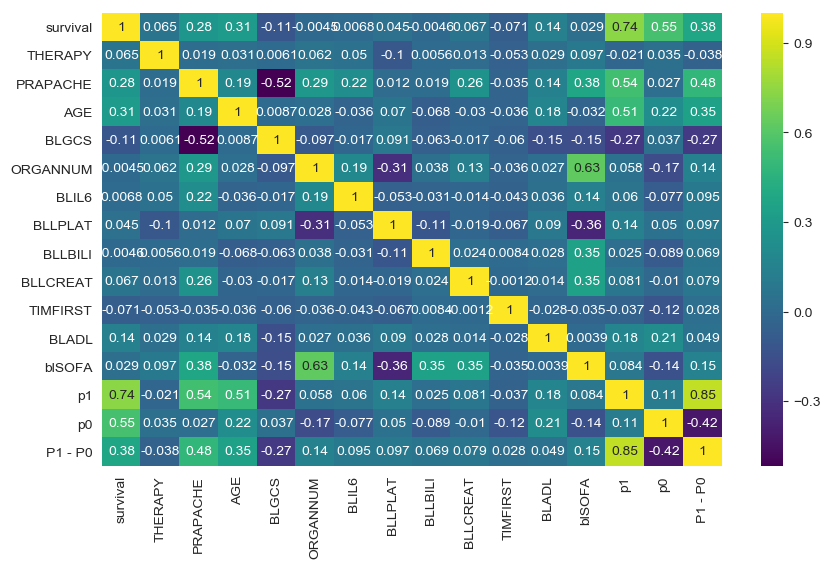

In [46]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(data_patch.corr(),annot=True,cmap='viridis');

### Build Final Model
 build the final model after the enhance effect has been calculated assumin they took both treatments

In [47]:
X = data_patch.drop(['p0','p1','survival','P1 - P0','THERAPY'],axis=1)
y = data_patch['P1 - P0']

In [48]:
# let's build the model using a decisiontreeregressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
final_model = DecisionTreeRegressor()

In [50]:
final_model.fit(X,y)

DecisionTreeRegressor()

In [51]:
final_model.feature_importances_

array([0.38553034, 0.15594977, 0.04757947, 0.0154227 , 0.04437857,
       0.05267849, 0.06656589, 0.04020275, 0.08294303, 0.0581974 ,
       0.05055159])

In [52]:
X.columns

Index(['PRAPACHE', 'AGE', 'BLGCS', 'ORGANNUM', 'BLIL6', 'BLLPLAT', 'BLLBILI',
       'BLLCREAT', 'TIMFIRST', 'BLADL', 'blSOFA'],
      dtype='object')

In [53]:
pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['feature importance']).sort_values('feature importance')

,feature importance
ORGANNUM,0.015423
BLLCREAT,0.040203
BLIL6,0.044379
BLGCS,0.047579
blSOFA,0.050552
BLLPLAT,0.052678
BLADL,0.058197
BLLBILI,0.066566
TIMFIRST,0.082943
AGE,0.155950


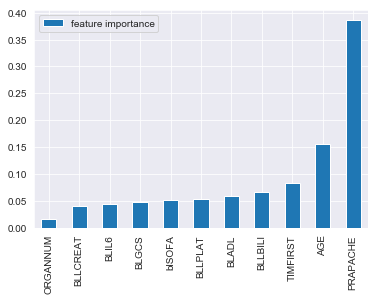

In [54]:
pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['feature importance']).sort_values('feature importance').plot(kind='bar')

In [55]:
from sklearn.tree import plot_tree

In [56]:
final_model = DecisionTreeRegressor(max_depth=2)

In [57]:
final_model.fit(X,y)

DecisionTreeRegressor(max_depth=2)

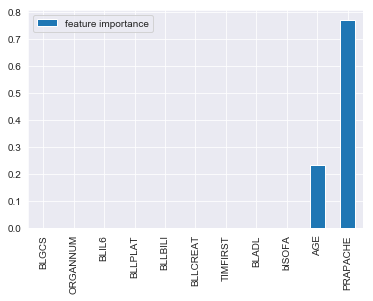

In [58]:
pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['feature importance'])\
.sort_values('feature importance').plot(kind='bar')

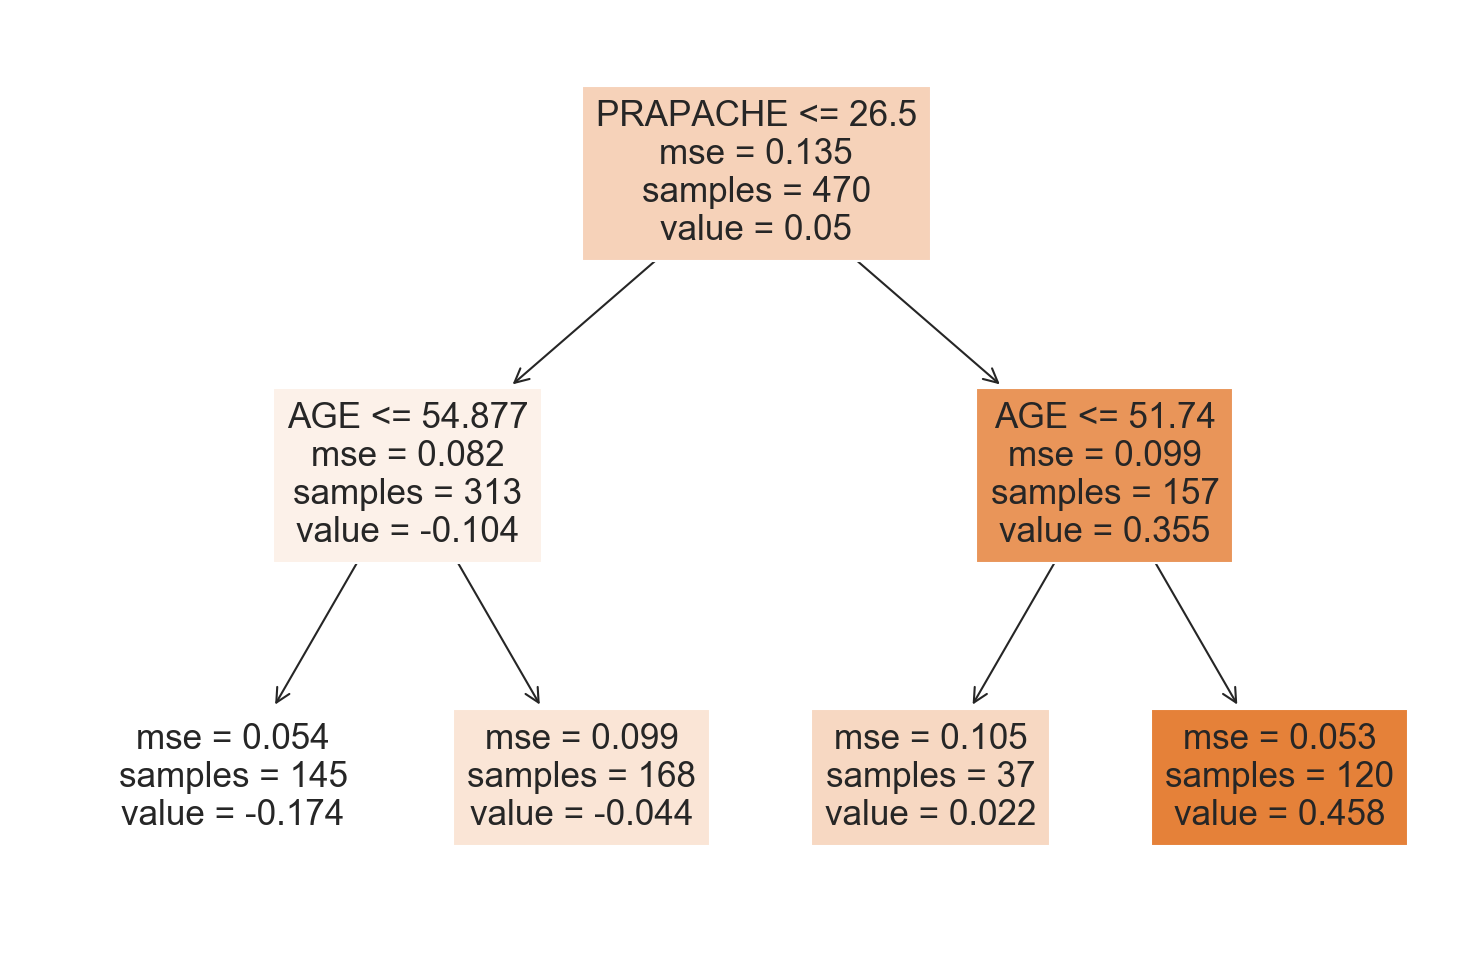

In [59]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(final_model,filled=True,feature_names=X.columns);

## Build Other Model

In [60]:
def buildModels(algo,param_grid):
    
    global final_data
    # Build first model
    
    grid_model1 = GridSearchCV(algo,param_grid=param_grid,cv=3)
    grid_model1.fit(X_train_active_group,y_train1_active_group)
    y_p1_of_control_group = grid_model1.predict_proba(X_test_active_group)
    y_p1 = grid_model1.predict_proba(X_train_active_group)
    
    #Build second model
    
    grid_model2 = GridSearchCV(algo,param_grid=param_grid,cv=3)
    grid_model2.fit(X_train_control_group,y_train0_control_group)
    y_p0_of_active_group = grid_model2.predict_proba(X_test_control_group)
    y_p0 = grid_model2.predict_proba(X_train_control_group)
    
    
    # join the data
    data_patch = pd.concat([active_group,control_group],axis=0)
    p1_patch = np.concatenate([ y_p1[:,1], y_p1_of_control_group[:,1] ],axis=0)
    p0_patch = np.concatenate([ y_p0_of_active_group[:,1] ,y_p0[:,1] ],axis=0)
    data_patch['p1'] =p1_patch
    data_patch['p0'] =p0_patch
    data_patch['P1 - P0'] = data_patch['p1']- data_patch['p0']
    final_data = data_patch
    
    

In [61]:
def build_final_model():
    X = final_data.drop(['p0','p1','survival','P1 - P0','THERAPY'],axis=1)
    y = final_data['P1 - P0']

    final_model = DecisionTreeRegressor()
    final_model.fit(X,y)
    pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['feature importance'])\
    .sort_values('feature importance').plot(kind='bar')
    final_model = DecisionTreeRegressor(max_depth=2)
    final_model.fit(X,y)
    pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['feature importance'])\
    .sort_values('feature importance').plot(kind='bar')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(final_model,filled=True,feature_names=X.columns);

### Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logistic_algo = LogisticRegression(max_iter=5000)

param_grid = { 'penalty':['l1','l2','elasticnet'],
                'l1_ratio': np.linspace(0,1,20),
                'C': np.logspace(0,10,20),
                 'solver': ['saga','lbfgs', 'liblinear']
    
}

In [ ]:
buildModels(logistic_algo,param_grid)

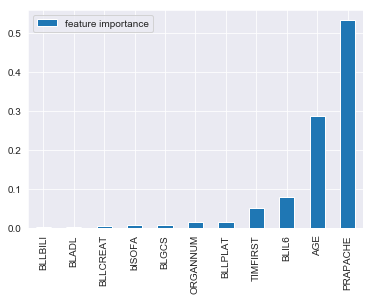

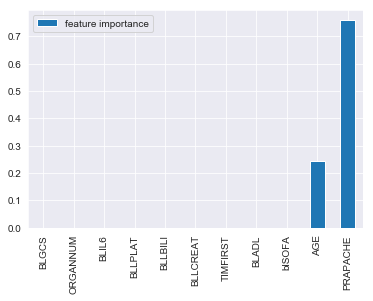

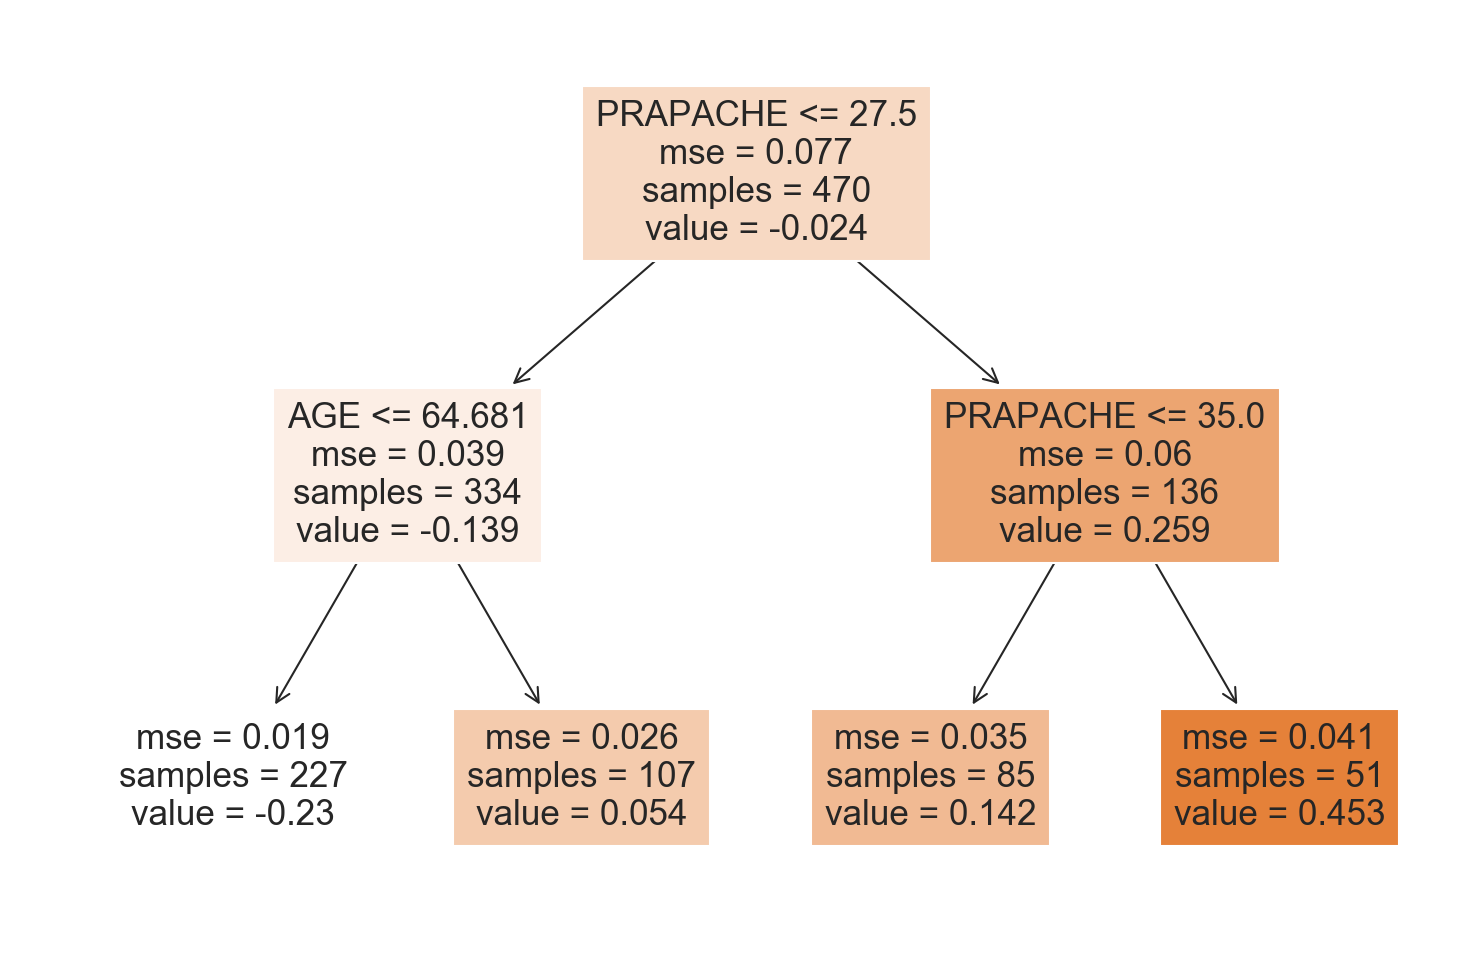

In [118]:
build_final_model()

### RandomForest Hyperparams Tuned

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc_algo = RandomForestClassifier(oob_score=True,bootstrap=True)

param_grid = { 'n_estimators':[10,64,100,150,200],
              'max_features': ["auto", "sqrt", "log2",5]
}
# reason for using few parameters, we do not want the data to leave out some biomarkers at the initial stage of trying to get the treatment
# effect on the opposiste therapy

In [ ]:
buildModels(rfc_algo,param_grid=param_grid)

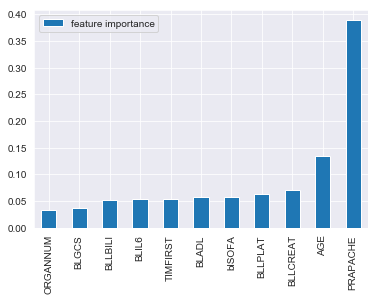

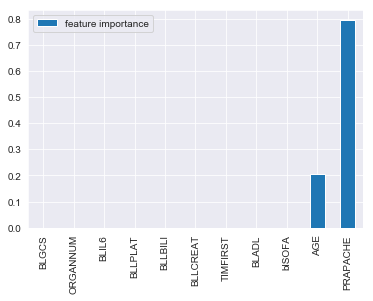

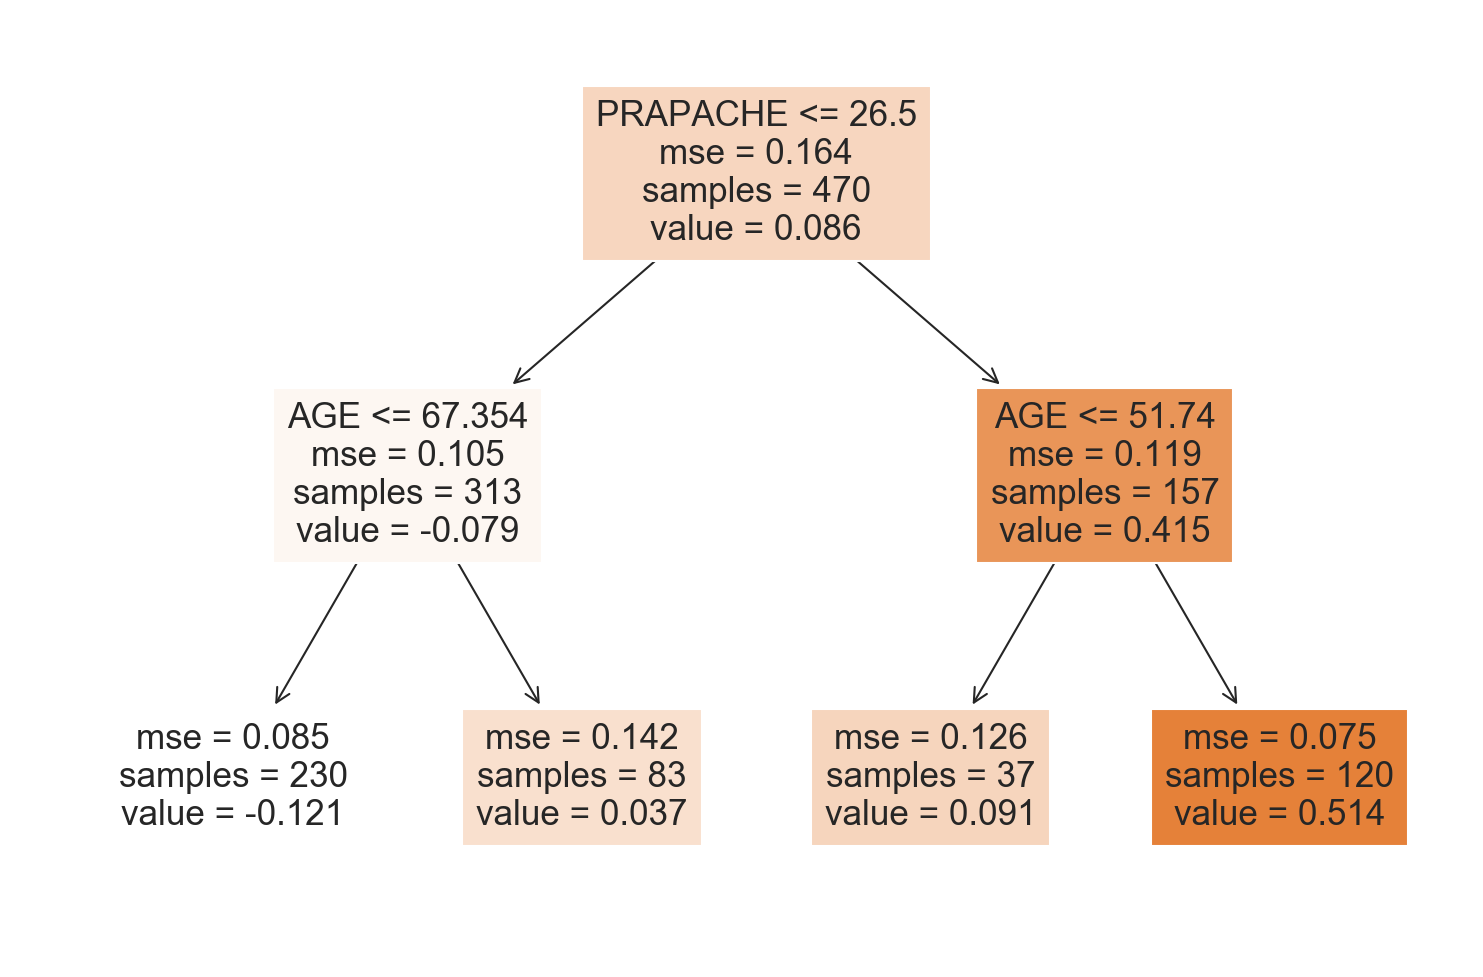

In [68]:
build_final_model()

### AdasBoost Hyperparams Tuned

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada_algo = AdaBoostClassifier()

param_gird = {'n_estimators': np.arange(1,200)}

In [74]:
buildModels(ada_algo,param_grid=param_gird)

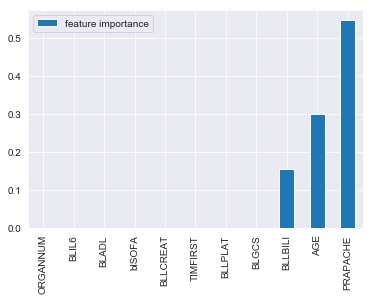

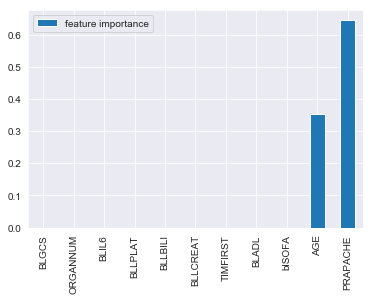

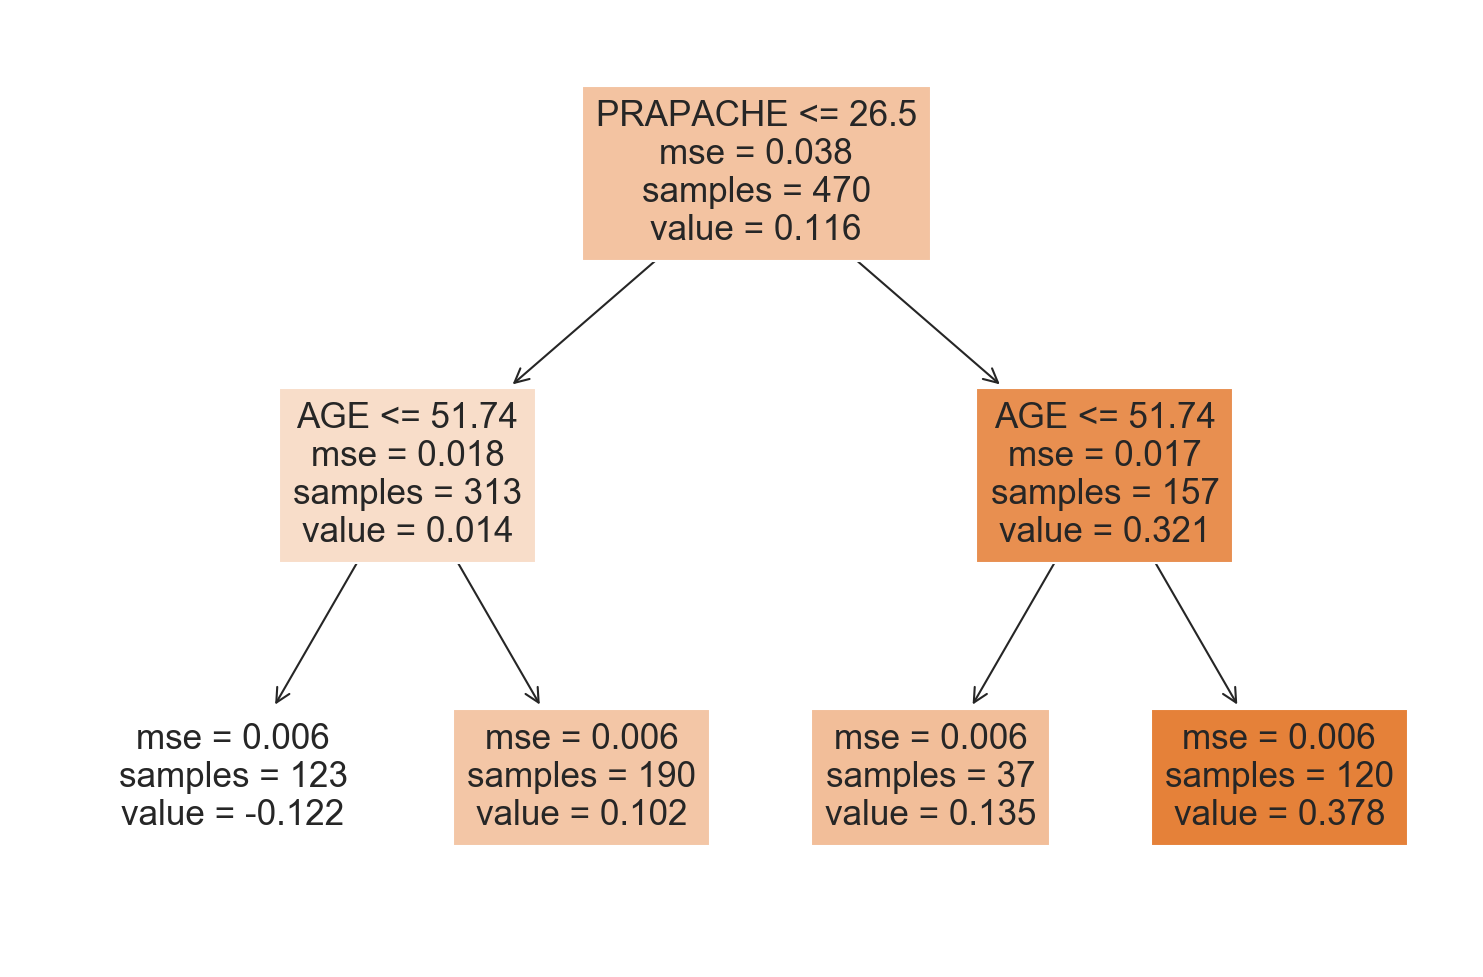

In [75]:
build_final_model()

### GradientBoosting Hyperparams Tuned

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
grad_algo = GradientBoostingClassifier()

param_grid = { 'n_estimators': np.arange(1,150)
      
             }

In [78]:
buildModels(grad_algo,param_grid=param_gird)

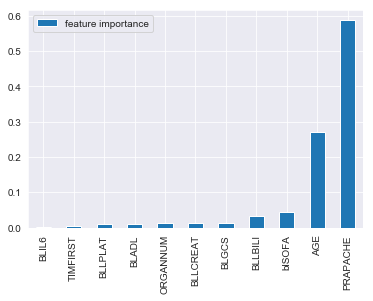

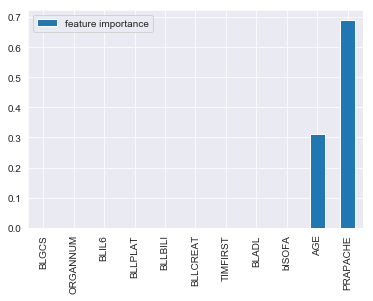

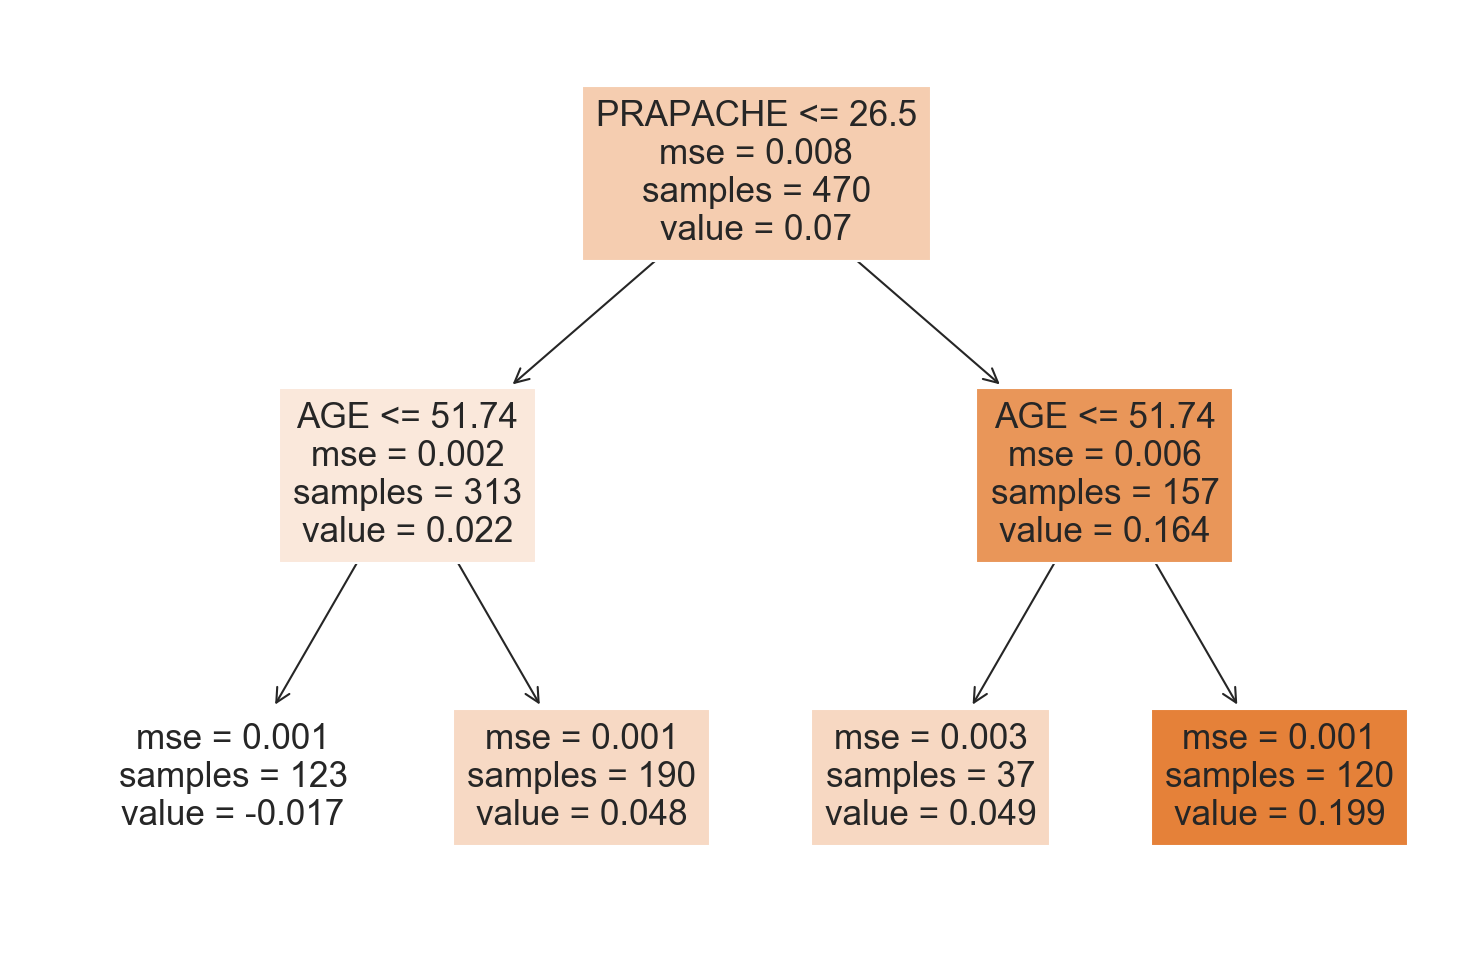

In [79]:
build_final_model()

## Subgroup Results and Analysis

In [2]:
theData = pd.read_csv('sepsis_new.csv')

In [3]:
theData.head(2)

,survival,THERAPY,PRAPACHE,AGE,BLGCS,ORGANNUM,BLIL6,BLLPLAT,BLLBILI,BLLCREAT,TIMFIRST,BLADL,blSOFA,p1,p0,P1 - P0
0,0,1,19,42.921,15,1,301.8,191.000000,2.913416,1.0,17.17,0.0,5.0,0.20,0.50,-0.30
1,1,1,48,68.818,11,2,118.9,264.156481,0.400000,1.1,17.17,5.0,10.0,0.93,0.47,0.46


In [4]:
def subResults(data, condition, algoName):
    tempData = data[condition]
    subgroupSize = len(tempData) # get the subgroup size from condition(subgroup) passed.
    print('Subgroup Size for',algoName,subgroupSize)
    
    # get treatment sample size, i.e Therapy==1
    treatmentSize = len(tempData[ tempData['THERAPY'] == 1 ])
    print('Treament Sample Size  for',algoName,treatmentSize)
    
    #get treament effect ratee i.e what is the survival rate when the therapy is 1
    temp2 = tempData[ tempData['THERAPY'] == 1 ]
    treatmentEventRate = len(temp2[temp2['survival'] == 1])/len(temp2)
    print('Treament Event Rate  for',algoName, np.round(treatmentEventRate,4))
    
    
    # get treatment sample size, i.e Therapy==1
    controlSize = len(tempData[ tempData['THERAPY'] == 0 ])
    print('Control Sample Size  for',algoName,controlSize)
    
    
    #get control effect ratee i.e what is the survival rate when the therapy is 1
    temp3 = tempData[ tempData['THERAPY'] == 0 ]
    controlEventRate = len(temp3[temp3['survival'] == 1])/len(temp3)
    print('Control Event Rate  for',algoName, np.round(controlEventRate,4))
    
    print('TER - CER',np.round(treatmentEventRate-controlEventRate,4))

In [5]:
condition = (theData['PRAPACHE'] <= 26.5) & (theData['AGE'] <= 54.877)

In [6]:
subResults(theData,condition,'Random Forest')

Subgroup Size for Random Forest 145
Treament Sample Size  for Random Forest 95
Treament Event Rate  for Random Forest 0.1053
Control Sample Size  for Random Forest 50
Control Event Rate  for Random Forest 0.28
TER - CER -0.1747


In [7]:
condition = (theData['PRAPACHE'] <= 26.5) & (theData['AGE'] <= 67.354)

In [8]:
subResults(theData,condition,'Random Forest Tuned')

Subgroup Size for Random Forest Tuned 230
Treament Sample Size  for Random Forest Tuned 150
Treament Event Rate  for Random Forest Tuned 0.16
Control Sample Size  for Random Forest Tuned 80
Control Event Rate  for Random Forest Tuned 0.3125
TER - CER -0.1525


In [9]:
condition = (theData['PRAPACHE'] <= 26.5) & (theData['AGE'] <= 51.74)

In [10]:
subResults(theData,condition,'AdaBoost and GradientBoost')

Subgroup Size for AdaBoost and GradientBoost 123
Treament Sample Size  for AdaBoost and GradientBoost 82
Treament Event Rate  for AdaBoost and GradientBoost 0.0732
Control Sample Size  for AdaBoost and GradientBoost 41
Control Event Rate  for AdaBoost and GradientBoost 0.2195
TER - CER -0.1463


In [11]:
condition = (theData['PRAPACHE'] <= 26) & (theData['AGE'] <= 49.80)

In [12]:
subResults(theData,condition,'True Subgroup')

Subgroup Size for True Subgroup 100
Treament Sample Size  for True Subgroup 67
Treament Event Rate  for True Subgroup 0.0597
Control Sample Size  for True Subgroup 33
Control Event Rate  for True Subgroup 0.1818
TER - CER -0.1221


#### 95/145

In [93]:
0.1053 / 0.655

0.16076335877862596

In [13]:
95/145


0.6551724137931034

In [22]:
len(theData[ (theData['PRAPACHE'] <= 26.5) & (theData['AGE'] <= 51.74) & (theData['survival'] ==1 )])

15

In [25]:
len(theData[ (theData['PRAPACHE'] <= 26.5) & (theData['AGE'] <= 51.74) & (theData['survival'] ==0 )])

108

In [27]:
10/28

0.35714285714285715

In [24]:
10 + 5 + 18

33